# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Setiawan Ariansyah
- Email: ariansyahsetiawan818@gmail.com
- Id Dicoding: setiawan_ariansyah_mhs0

## Persiapan

### Menyiapkan library yang dibutuhkan

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import joblib

### Menyiapkan data yang akan diguankan

In [367]:
data = pd.read_csv("D:/Kuliah/NonSTIS/Programming/Python/Proyek Final/data.csv", sep = ";")

In [368]:
data.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [369]:
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

Dataset ini merupakan kumpulan data yang dibuat dari institusi pendidikan tinggi (diperoleh dari beberapa database terpisah) terkait mahasiswa yang terdaftar di berbagai gelar sarjana, seperti agronomi, desain, pendidikan, keperawatan, jurnalisme, manajemen, layanan sosial, dan teknologi. Dataset tersebut mencakup informasi yang diketahui pada saat pendaftaran mahasiswa (jalur akademik, demografi, dan faktor sosial ekonomi) dan prestasi akademik mahasiswa pada akhir semester pertama dan kedua. Data tersebut digunakan untuk membangun model klasifikasi untuk memprediksi siswa putus sekolah dan keberhasilan akademik.

In [370]:
data.shape

(4424, 37)

In [371]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [372]:
pd.set_option('display.max_columns', None)
data.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [373]:
# Pengecekan Null
data.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [374]:
# Menghapus kolom Unemployment rate, Inflation rate, dan GDP
data.drop(["Unemployment_rate", "Inflation_rate", "GDP"], axis = 1, inplace=True)

In [375]:
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,Graduate


In [376]:
data.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [377]:
data["Status"] = data["Status"].astype("category")

In [378]:
data["Status"].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

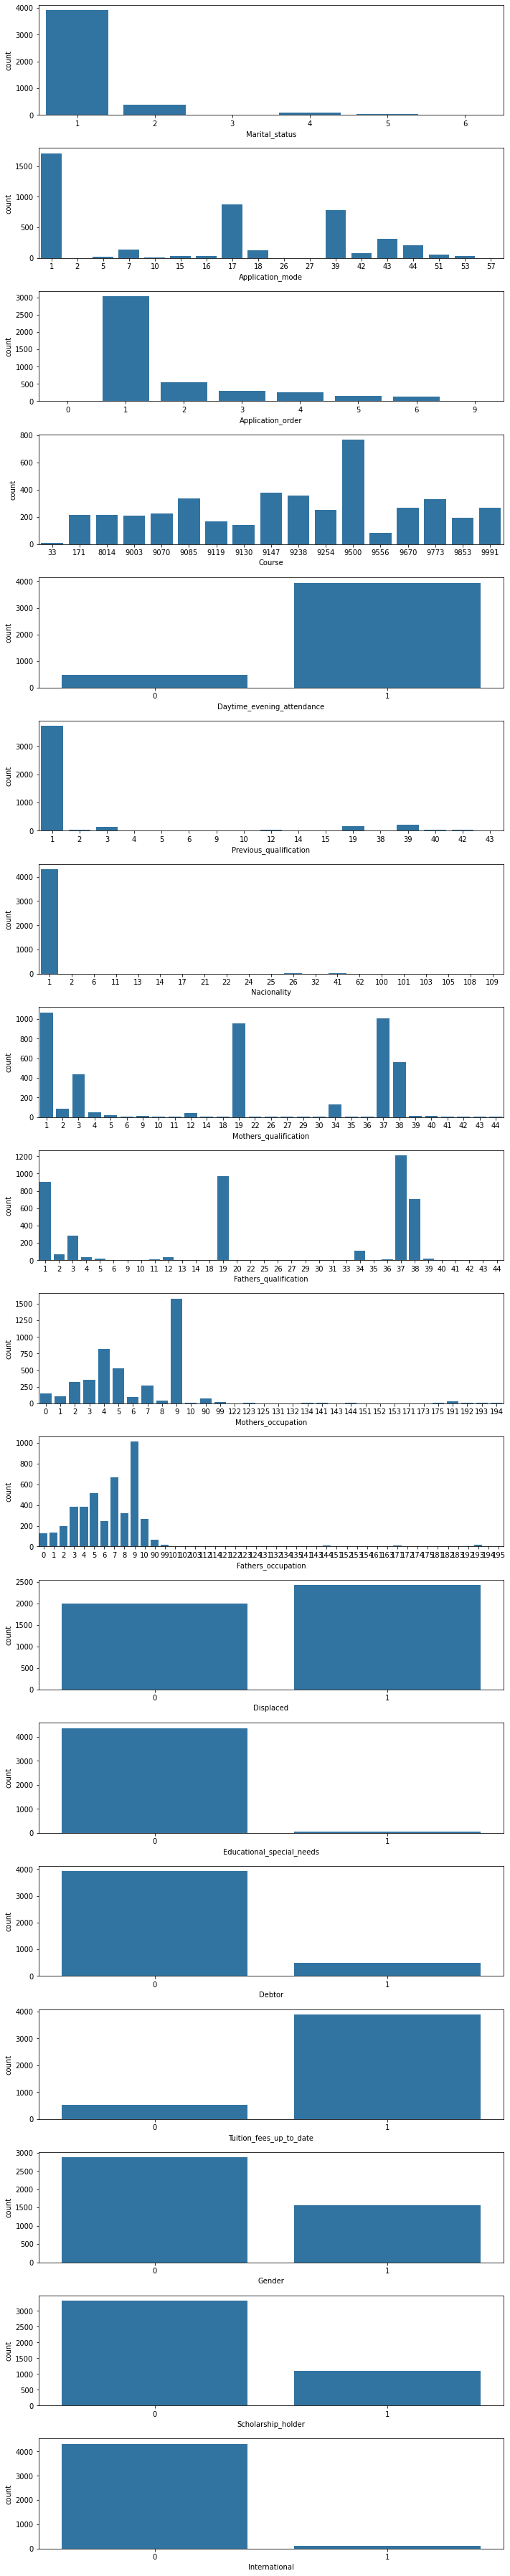

In [379]:
categorical_columns = ["Marital_status", "Application_mode", "Application_order",
                       "Course", "Daytime_evening_attendance", "Previous_qualification",
                       "Nacionality", "Mothers_qualification", "Fathers_qualification",
                       "Mothers_occupation", "Fathers_occupation", "Displaced",
                       "Educational_special_needs", "Debtor", "Tuition_fees_up_to_date",
                       "Gender", "Scholarship_holder", "International"]
def categorical_plot(features, df, segment_feature=None):
  fig, ax = plt.subplots(len(features), 1, figsize=(10,50))
  for i, feature in enumerate(features):
    if segment_feature:
      sns.countplot(data=df, y=segment_feature, hue=feature, ax=ax[i])
    else:
      sns.countplot(data=df, x=feature, ax=ax[i])
  plt.tight_layout()
  plt.show()
categorical_plot(
    features=categorical_columns,
    df=data,
)

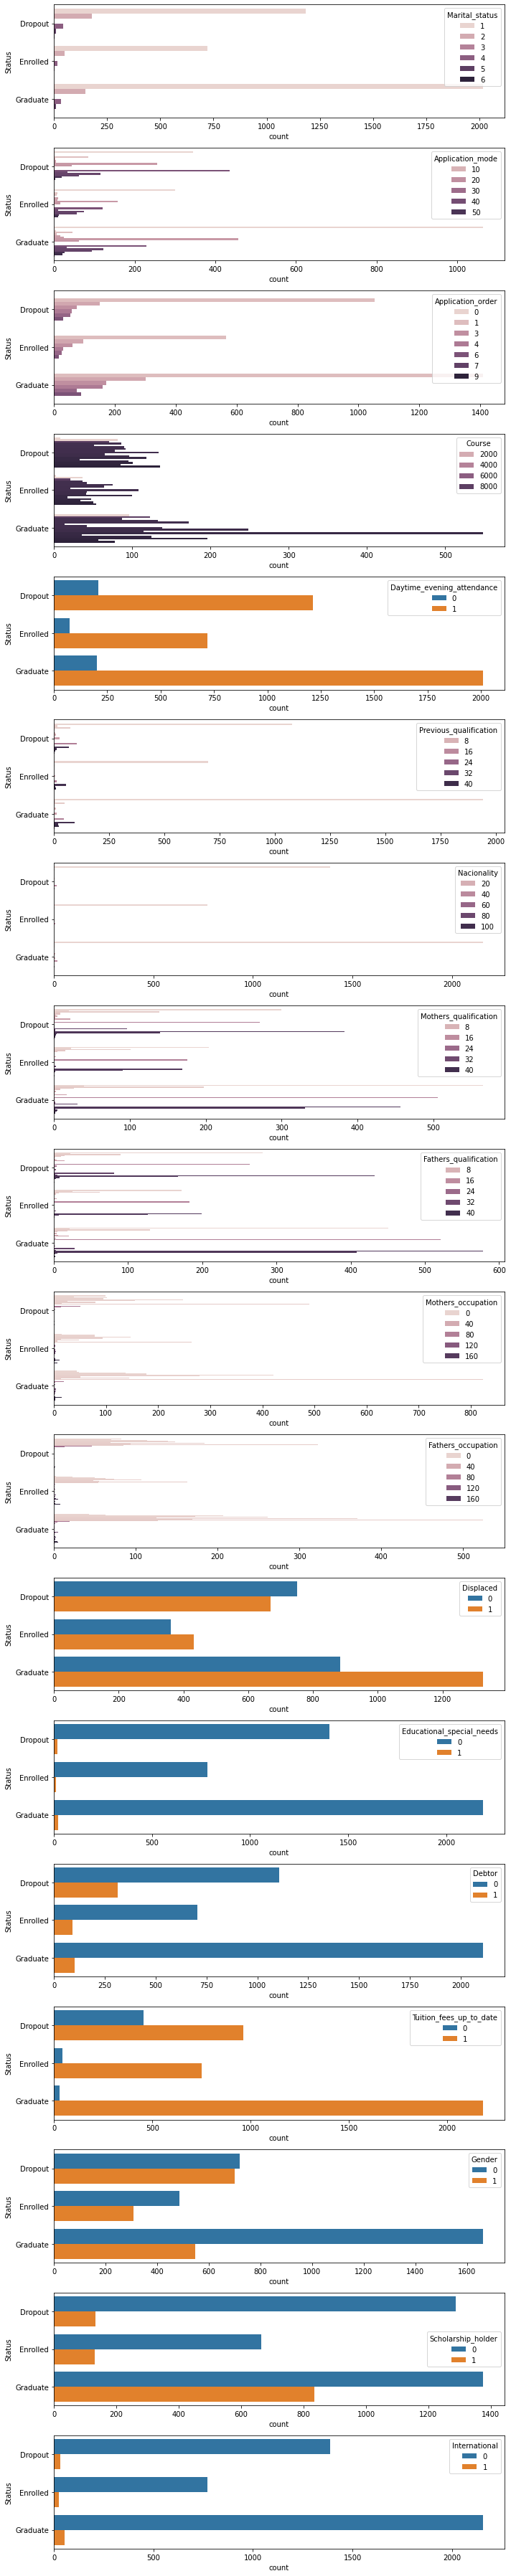

In [380]:
categorical_plot(
    features=categorical_columns,
    df=data,
    segment_feature="Status"
)

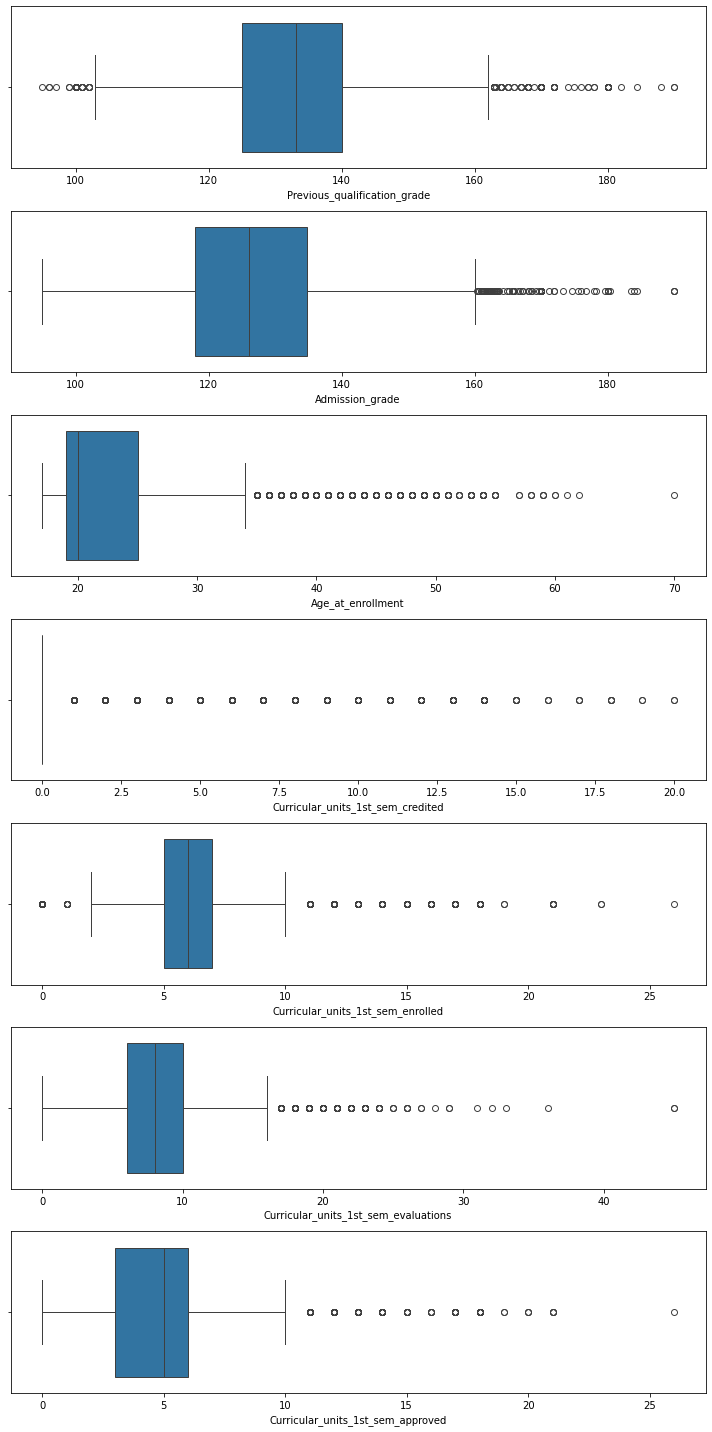

In [381]:
numerical_columns = ["Previous_qualification_grade", "Admission_grade",
                    "Age_at_enrollment", "Curricular_units_1st_sem_credited",
                     "Curricular_units_1st_sem_enrolled", "Curricular_units_1st_sem_evaluations",
                     "Curricular_units_1st_sem_approved"]
def numerical_plot(features, df, segment_feature=None):
  fig, ax = plt.subplots(len(features), 1, figsize=(10,20))
  for i, feature in enumerate(features):
    if segment_feature:
      sns.boxplot(data=df, y=segment_feature, hue=feature, ax=ax[i])
    else:
      sns.boxplot(data=df, x=feature, ax=ax[i])
  plt.tight_layout()
  plt.show()

numerical_plot(
    features=numerical_columns,
    df=data
)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2040\2184897198.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


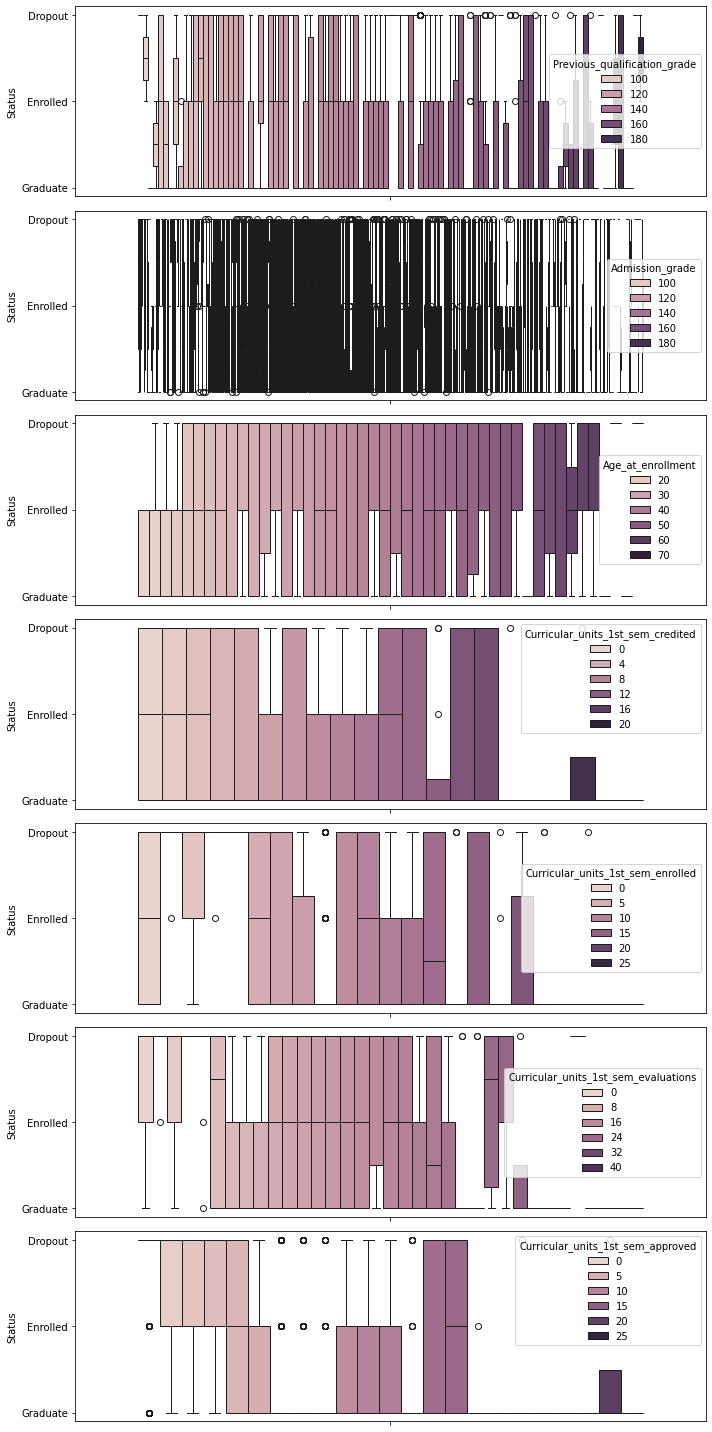

In [382]:
numerical_plot(
    features=numerical_columns,
    df=data,
    segment_feature="Status"
)

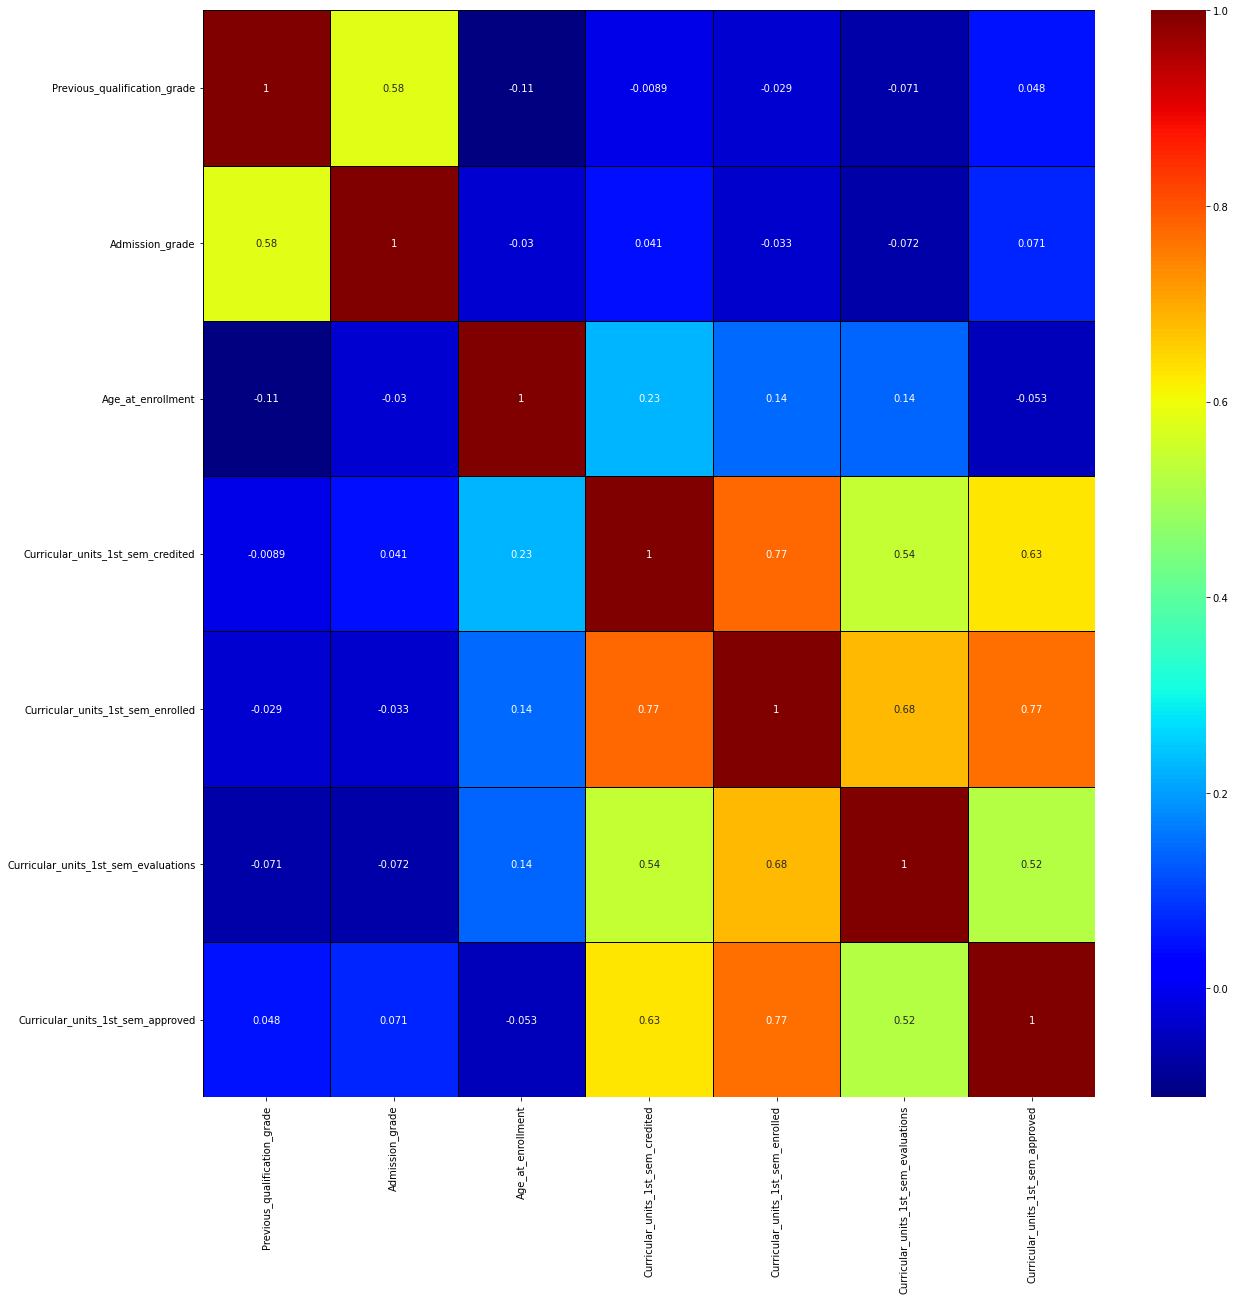

In [383]:
plt.figure(figsize=(20,20))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap="jet", linecolor="black", linewidth=1)
plt.show()

In [384]:
def calculate_vif(df):
    # Tambahkan konstanta (intercept term)
    df_with_const = add_constant(df)

    # DataFrame untuk menyimpan nilai VIF
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

    return vif_data

# Menghitung VIF
vif_data = calculate_vif(data[numerical_columns])
print(vif_data)

                                Feature         VIF
0                                 const  155.396532
1          Previous_qualification_grade    1.531051
2                       Admission_grade    1.550764
3                     Age_at_enrollment    1.161030
4     Curricular_units_1st_sem_credited    2.664808
5     Curricular_units_1st_sem_enrolled    4.621630
6  Curricular_units_1st_sem_evaluations    1.880549
7     Curricular_units_1st_sem_approved    2.721143


## Data Preparation / Preprocessing

In [385]:
# Marital status
marital_status_map = {
    1: 'belum kawin',    # single
    2: 'kawin',          # married
    3: 'cerai mati',     # widower
    4: 'cerai hidup',    # divorced
    5: 'kawin',          # facto union
    6: 'cerai hidup'     # legally separated
}
data["KatMarital_status"] = data["Marital_status"].map(marital_status_map)

In [386]:
# Application mode
application_mode_map = {
    1: 'general contingent',
    17: 'general contingent',
    16: 'general contingent',
    5: 'special contingent',
    16: 'special contingent',
    26: 'special contingent',
    27: 'special contingent',
    2: 'legislative ordinance',
    10: 'legislative ordinance',
    15: 'international student',
    57: 'international student',
    7:'Higher Education Course Holders',
    44:'Higher Education Course Holders',
    53: 'Higher Education Course Holders',
    39: 'adult learner',
    42: 'transfer and change',
    43: 'transfer and change',
    51: 'transfer and change',
}
data['KatApplication_mode'] = data['Application_mode'].map(application_mode_map)

In [387]:
map_course = {
    33: 'Engineering and Technology',
    9119: 'Engineering and Technology',
    171: 'Design and Multimedia',
    9070: 'Design and Multimedia',
    9003: 'Agricultural and Veterinary Sciences',
    9085: 'Agricultural and Veterinary Sciences',
    9130: 'Agricultural and Veterinary Sciences',
    9500:'Health sciences',
    9556:'Health sciences',
    8014: 'Social sciences',
    9238: 'Social sciences',
    9853: 'Social sciences',
    9773: 'Social sciences',
    9147: 'Business and management',
    9670: 'Business and management',
    9991: 'Business and management',
    9254: 'Tourism',
}
data['KatCourse'] = data['Course'].map(map_course)

In [388]:
map_previous_cual = {
    1: "Secondary Education",
    9: "Secondary Education",
    10: "Secondary Education",
    12: "Secondary Education",
    14: "Secondary Education",
    15: "Secondary Education",
    19: "Secondary Education",
    38: "Secondary Education",
    2: "Higher Education",
    3: "Higher Education",
    4: "Higher Education",
    5: "Higher Education",
    6: "Higher Education",
    40: "Higher Education",
    43: "Higher Education",
    39: "Vocational and Technological Education",
    42: "Vocational and Technological Education"
}
data["Kat_PreviousQualification"] = data["Previous_qualification"].map(map_previous_cual)

In [389]:
map_nacionality = {
    1: "Europe",
    2: "Europe",
    6: "Europe",
    11: "Europe",
    13: "Europe",
    14: "Europe",
    17: "Europe",
    62: "Europe",
    100: "Europe",
    103: "Europe",
    105: "Europe",
    21: "Asia & Africa",
    22: "Asia & Africa",
    24: "Asia & Africa",
    25: "Asia & Africa",
    26: "Asia & Africa",
    41: "Americas",
    101: "Americas",
    108: "Americas",
    109: "Americas",
    32: "Asia & Africa"
}
data["KatNacionality"] = data["Nacionality"].map(map_nacionality)

In [390]:
map_mother_qual = {
    1: "Secondary Education",
    9: "Secondary Education",
    10: "Secondary Education",
    12: "Secondary Education",
    14: "Secondary Education",
    18: "Secondary Education",
    19: "Secondary Education",
    22: "Secondary Education",
    26: "Primary Education",
    27: "Secondary Education",
    29: "Secondary Education",
    30: "Primary Education",
    35: "Primary Education",
    36: "Primary Education",
    37: "Primary Education",
    38: "Primary Education",
    11: "Primary Education",
    2: "Higher Education",
    3: "Higher Education",
    4: "Higher Education",
    5: "Higher Education",
    6: "Higher Education",
    40: "Higher Education",
    41: "Higher Education",
    42: "Higher Education",
    43: "Higher Education",
    44: "Higher Education",
    39: "Higher Education",
    34: "Unknown"
}

data["Kat_MotherQualification"] = data["Mothers_qualification"].map(map_mother_qual)

In [391]:
map_father_occupation = {
    0: "Students",
    1: "Executives and Directors",
    112: "Executives and Directors",
    114: "Executives and Directors",
    2: "Professionals",
    121: "Professionals",
    122: "Professionals",
    123: "Professionals",
    124: "Professionals",
    3: "Intermediate Level Technicians",
    131: "Intermediate Level Technicians",
    132: "Intermediate Level Technicians",
    134: "Intermediate Level Technicians",
    135: "Intermediate Level Technicians",
    4: "Administrative Staff",
    141: "Administrative Staff",
    143: "Administrative Staff",
    144: "Administrative Staff",
    5: "Service Workers",
    151: "Service Workers",
    152: "Service Workers",
    153: "Service Workers",
    154: "Service Workers",
    6: "Agricultural and Skilled Workers",
    161: "Agricultural and Skilled Workers",
    163: "Agricultural and Skilled Workers",
    7: "Skilled Workers",
    171: "Skilled Workers",
    172: "Skilled Workers",
    174: "Skilled Workers",
    175: "Skilled Workers",
    8: "Operators and Assemblers",
    181: "Operators and Assemblers",
    182: "Operators and Assemblers",
    183: "Operators and Assemblers",
    9: "Unskilled Workers",
    192: "Unskilled Workers",
    193: "Unskilled Workers",
    194: "Unskilled Workers",
    195: "Unskilled Workers",
    10: "Armed Forces",
    101: "Armed Forces",
    102: "Armed Forces",
    103: "Armed Forces",
    90: "Other Situations",
    99: "Other Situations"
}
data["Kat_FatherOccupation"] = data["Fathers_occupation"].map(map_father_occupation)

In [392]:
data["Kat_FatherQualification"] = data["Fathers_qualification"].map(map_mother_qual)

In [393]:
data["Kat_MotherOccupation"] = data["Mothers_occupation"].map(map_father_occupation)

In [394]:
data["Kat_MotherOccupation"].value_counts()

Kat_MotherOccupation
Unskilled Workers                   1597
Administrative Staff                 834
Service Workers                      537
Intermediate Level Technicians       359
Professionals                        327
Skilled Workers                      278
Students                             144
Executives and Directors             102
Agricultural and Skilled Workers      91
Other Situations                      87
Operators and Assemblers              36
Armed Forces                           4
Name: count, dtype: int64

In [395]:
data.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [396]:
data["KatMarital_status"] = data["KatMarital_status"].astype('category')
data["KatApplication_mode"] = data["KatApplication_mode"].astype('category')
data["KatCourse"] = data["KatCourse"].astype('category')
data["Kat_PreviousQualification"] = data["Kat_PreviousQualification"].astype('category')
data["KatNacionality"] = data["KatNacionality"].astype('category')
data["Kat_MotherQualification"] = data["Kat_MotherQualification"].astype('category')
data["Kat_FatherQualification"] = data["Kat_FatherQualification"].astype('category')
data["Kat_FatherOccupation"] = data["Kat_FatherOccupation"].astype('category')
data["Kat_MotherOccupation"] = data["Kat_MotherOccupation"].astype('category')

In [397]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   int64   
 1   Application_mode                              4424 non-null   int64   
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   int64   
 4   Daytime_evening_attendance                    4424 non-null   int64   
 5   Previous_qualification                        4424 non-null   int64   
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nacionality                                   4424 non-null   int64   
 8   Mothers_qualification                         4424 non-null   int64   
 9   Fathers_qualification                         4424 n

In [398]:
data.drop(columns=["Marital_status", "Application_mode",
                       "Course", "Previous_qualification",
                       "Nacionality", "Mothers_qualification", "Fathers_qualification",
                       "Mothers_occupation", "Fathers_occupation"], axis=1, inplace=True)

In [399]:
#Train test split
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [400]:
print(train_df.shape)
print(test_df.shape)

(3539, 34)
(885, 34)


In [401]:
data["Status"].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

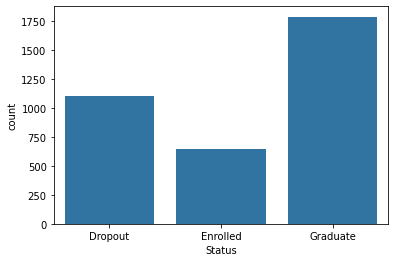

In [402]:
sns.countplot(data=train_df, x="Status")
plt.show()

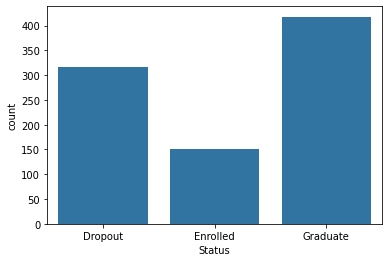

In [403]:
sns.countplot(data=test_df, x="Status")
plt.show()

# Split X and Y

In [404]:
X_train = train_df.drop(columns="Status", axis=1)
Y_train = train_df["Status"]

X_test = test_df.drop(columns="Status", axis=1)
Y_test = test_df["Status"]

In [405]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3539, 33)
(3539,)
(885, 33)
(885,)


In [406]:
encoder = LabelEncoder()
encoder.fit(Y_train)
new_y_train = encoder.transform(Y_train)
joblib.dump(encoder, "model/encoder_target.joblib")

new_y_test = encoder.transform(Y_test)

In [407]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
            
            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df


In [408]:
def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
            
            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        return df

In [409]:
categorical_columns = [
    'KatMarital_status', 'KatApplication_mode', 
    'KatCourse', 'Kat_PreviousQualification', 
    'KatNacionality', 'Kat_MotherQualification', 
    'Kat_FatherQualification', 'Kat_FatherOccupation', 
    'Kat_MotherOccupation', 'Application_order', 
    'Daytime_evening_attendance', 'Displaced',
    'Educational_special_needs', 'Debtor', 
    'Tuition_fees_up_to_date', 'Gender', 
    'Scholarship_holder', 'International'
]

In [410]:
numerical_columns = ["Previous_qualification_grade", "Admission_grade",
                    "Age_at_enrollment", "Curricular_units_1st_sem_credited",
                     "Curricular_units_1st_sem_enrolled", "Curricular_units_1st_sem_evaluations",
                     "Curricular_units_1st_sem_approved", "Curricular_units_1st_sem_grade",
                     "Curricular_units_1st_sem_without_evaluations", "Curricular_units_2nd_sem_credited",
                     "Curricular_units_2nd_sem_enrolled", "Curricular_units_2nd_sem_evaluations",
                     "Curricular_units_2nd_sem_approved", "Curricular_units_2nd_sem_grade",
                     "Curricular_units_2nd_sem_without_evaluations"]

In [411]:
new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)

In [412]:
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

## Modeling

In [413]:
# Grid search
# Decision tree
#tree_model = DecisionTreeClassifier(random_state=42)

#param_grid = {
#    "max_features": ["auto", "sqrt", "log2"],
#    "max_depth": [5, 6, 7, 8],
#    "criterion": ["gini", "entropy"]
#}

#CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
#CV_tree.fit(new_train_df, Y_train)

In [414]:
#print("best parameter: ", CV_tree.best_params_)

In [415]:
tree_model = DecisionTreeClassifier(
    random_state = 123,
    criterion = "entropy",
    max_depth = 8,
    max_features = "auto"
)
tree_model.fit(new_train_df, new_y_train)
joblib.dump(tree_model, "model/tree_model.joblib")

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning

['model/tree_model.joblib']

In [416]:
# Random Forest
#rdf_model = RandomForestClassifier(random_state=42)

#param_grid = {
#    "n_estimators": [200, 500],
#    "max_features": ["auto", "sqrt", "log2"],
#    "max_depth": [6, 7, 8],
#    "criterion": ["gini", "entropy"]
#}

#CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
#CV_rdf.fit(new_train_df, Y_train)

In [417]:
#print("best parameters:" , CV_rdf.best_params_)

In [418]:
rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=8,
    n_estimators=200,
    max_features="auto",
    criterion="entropy",
    n_jobs=-1
)
rdf_model.fit(new_train_df, new_y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarn

['model/rdf_model.joblib']

In [419]:
# Gradient boosting
#gboost_model = GradientBoostingClassifier(random_state=123)

#param_grid = {
#    'max_depth': [5, 8],
#    'n_estimators': [200, 300],
#    'learning_rate': [0.01, 0.1],
#    'max_features': ['auto', 'sqrt', 'log2']
#}

#CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
#CV_gboost.fit(new_train_df, Y_train)

In [420]:
#print("best parameters: ", CV_gboost.best_params_)

In [421]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    learning_rate=0.1,
    max_depth=5,
    max_features='sqrt',
    n_estimators=200
)
gboost_model.fit(new_train_df, new_y_train)
joblib.dump(gboost_model, "model/gboost_model.joblib")

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


['model/gboost_model.joblib']

## Evaluation

In [422]:
def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels=['Dropout', 'Enrolled', 'Graduate']

    print(classification_report(y_pred=y_pred, y_true=y_true))

    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

    return confusion_matrix_df

In [423]:
# Decision tree
y_pred_test = tree_model.predict(new_test_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


              precision    recall  f1-score   support

     Dropout       0.80      0.63      0.71       316
    Enrolled       0.37      0.36      0.36       151
    Graduate       0.75      0.89      0.81       418

    accuracy                           0.70       885
   macro avg       0.64      0.62      0.63       885
weighted avg       0.71      0.70      0.70       885



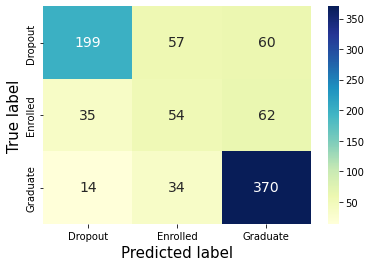

,Dropout,Enrolled,Graduate
Dropout,199,57,60
Enrolled,35,54,62
Graduate,14,34,370


In [424]:
evaluating(y_pred=y_pred_test, y_true=Y_test)

In [425]:
# Random forest
y_pred_test = rdf_model.predict(new_test_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


              precision    recall  f1-score   support

     Dropout       0.83      0.75      0.79       316
    Enrolled       0.55      0.22      0.31       151
    Graduate       0.74      0.95      0.83       418

    accuracy                           0.76       885
   macro avg       0.71      0.64      0.65       885
weighted avg       0.74      0.76      0.73       885



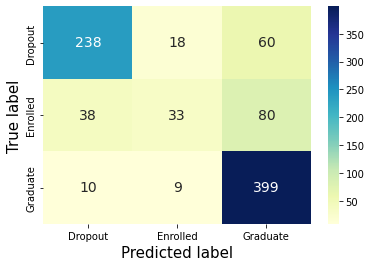

,Dropout,Enrolled,Graduate
Dropout,238,18,60
Enrolled,38,33,80
Graduate,10,9,399


In [426]:
evaluating(y_pred=y_pred_test, y_true=Y_test)

In [427]:
# Gradient boosting
y_pred_test = gboost_model.predict(new_test_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


              precision    recall  f1-score   support

     Dropout       0.83      0.75      0.79       316
    Enrolled       0.53      0.38      0.44       151
    Graduate       0.78      0.92      0.85       418

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885



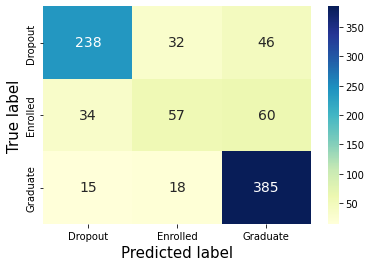

,Dropout,Enrolled,Graduate
Dropout,238,32,46
Enrolled,34,57,60
Graduate,15,18,385


In [428]:
evaluating(y_pred=y_pred_test, y_true=Y_test)

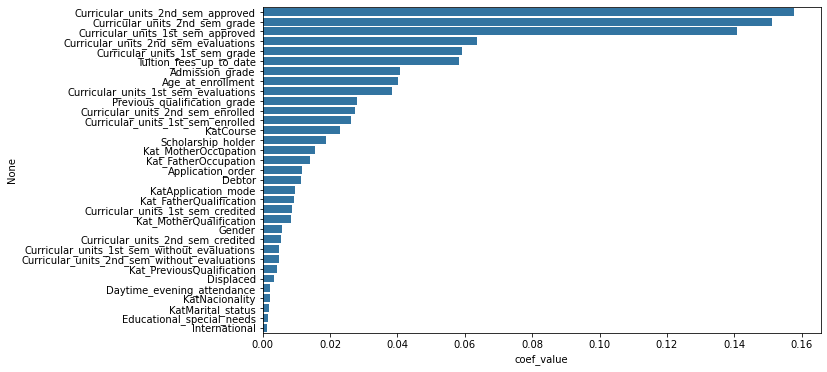

,coef_value
Curricular_units_2nd_sem_approved,0.157783
Curricular_units_2nd_sem_grade,0.151281
Curricular_units_1st_sem_approved,0.140955
Curricular_units_2nd_sem_evaluations,0.063736
Curricular_units_1st_sem_grade,0.059135
Tuition_fees_up_to_date,0.058338
Admission_grade,0.040648
Age_at_enrollment,0.040182
Curricular_units_1st_sem_evaluations,0.038351
Previous_qualification_grade,0.027999


In [429]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features

    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features

plot_feature_importances(gboost_model.feature_importances_, new_train_df.columns)